In [ ]:
from PIL import Image
from IPython.display import display 
from collections import defaultdict

h 710
w 1005


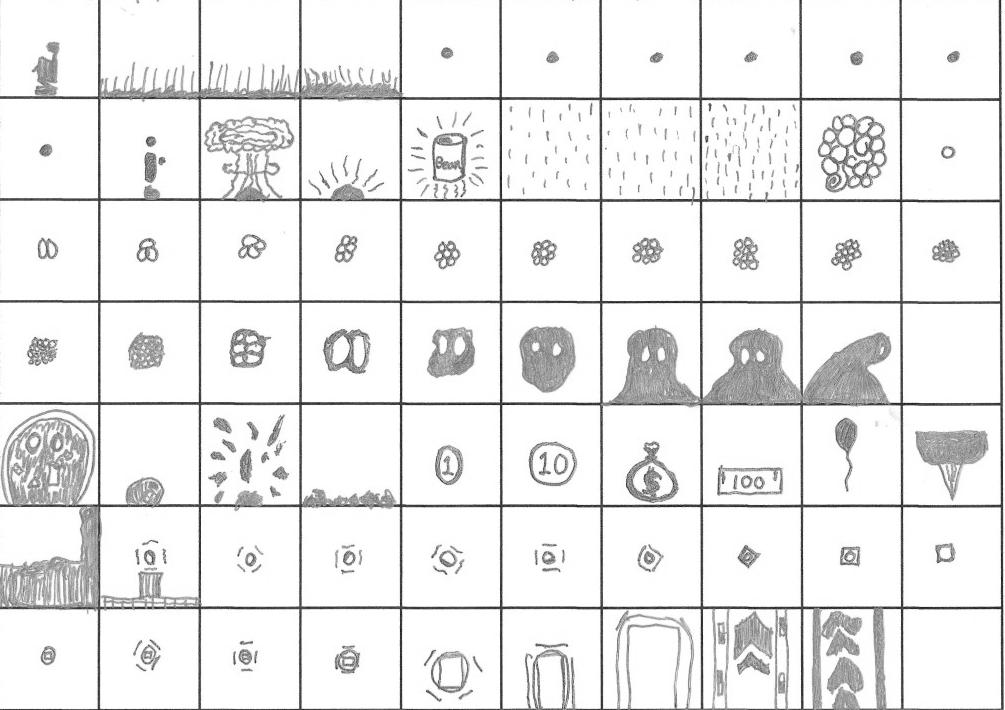

In [336]:
tiles_o = Image.open("tiles_cropped.jpg")
tiles = tiles_o.convert('L')
print('h',tiles.height)
print('w',tiles.width)
display(tiles)

In [337]:
import jsonpickle

In [338]:
class ResultSet():
    def __init__(self):
        self.list = []
    def append(self,item):
        self.list.append(item)
    def __repr__(self):
        return jsonpickle.encode(self.list,indent=4)

In [339]:
class VerticalResult():
    def __init__(self, y,lines):
        self.lines = lines
        self.y = y
    def __repr__(self):
        return f"{self.y}: {str(self.lines)}"

In [342]:
scans = ResultSet()
y_avg=6
for y in range(8,tiles.height-50,50):
    print('scanning y axis:',y)
    s = []
    inline= False
    sl =None
    for x in range(0,tiles.width,1):
        cs = []
        for cy in range(y-y_avg,y+y_avg):
            if cy<0 or cy>tiles.width:
                break
            c = tiles.getpixel((x, cy))
            cs.append(c)
        if (sum(cs)/len(cs))<100:
            if inline:
                continue #print('still inline')
            else:
                #print('sl',x)
                sl=x
                inline = True
        elif inline:
            s.append(range(sl,x))
            print('line at x: ',sl,'-',x)
            inline = False
    print('verticle lines',len(s), s)
    
    print()
    scans.append(VerticalResult(y,s))

scanning y axis: 8
line at x:  98 - 100
line at x:  199 - 201
line at x:  299 - 301
line at x:  400 - 402
line at x:  500 - 501
line at x:  600 - 602
line at x:  700 - 701
line at x:  800 - 801
line at x:  900 - 901
line at x:  999 - 1001
verticle lines 10 [range(98, 100), range(199, 201), range(299, 301), range(400, 402), range(500, 501), range(600, 602), range(700, 701), range(800, 801), range(900, 901), range(999, 1001)]

scanning y axis: 58
line at x:  98 - 100
line at x:  199 - 201
line at x:  300 - 301
line at x:  400 - 402
line at x:  500 - 502
line at x:  600 - 602
line at x:  700 - 702
line at x:  800 - 802
line at x:  900 - 902
line at x:  999 - 1001
verticle lines 10 [range(98, 100), range(199, 201), range(300, 301), range(400, 402), range(500, 502), range(600, 602), range(700, 702), range(800, 802), range(900, 902), range(999, 1001)]

scanning y axis: 108
line at x:  98 - 100
line at x:  199 - 201
line at x:  299 - 301
line at x:  400 - 402
line at x:  500 - 502
line at x: 

In [343]:
columns = defaultdict(int)
for item in scans.list:
    for column in item.lines:
        columns[column]+=1

In [344]:
avg = sum(columns.values())/len(columns.values())
print ('required row attendance', avg)

required row attendance 5.222222222222222


In [345]:
class xcutImageResult():
    def __init__(self, pos, image):
        self.pos = pos
        self.image = image

In [346]:
class Cutter():
    def __init__(self,image):
        self.image = image
        self.x_cols = []
        self.x_slices=[]
    def addVerticleCut(self, x):
        x=list(x)
        if len(x)==1:
            x.append(x[0]+1)
        print(f"V-Cut added at {x}")
        self.x_cols.append(x)
    def slicex(self):
        in_line = True
        prev = 0
        prev_x=0
        for x in range(0,self.image.width):
            if any([x in f for f in self.x_cols]):
                if in_line:
                    prev_x = x
                    in_line=False
                else:
                    if x-prev_x<5: 
                        continue
                    in_line=True
                    print(f"Image from {prev_x}-{x}")
                    self.x_slices.append(xcutImageResult(pos=(prev_x,x),image=self.image.crop((prev_x,0,x,self.image.height))))
            previous = x
        

In [347]:
cutr = Cutter(tiles)

for col in columns:
    if columns[col] >= avg:
        cutr.addVerticleCut(col)

V-Cut added at [98, 99]
V-Cut added at [199, 200]
V-Cut added at [400, 401]
V-Cut added at [600, 601]
V-Cut added at [300, 301]
V-Cut added at [500, 501]
V-Cut added at [700, 701]
V-Cut added at [801, 802]
V-Cut added at [901, 902]
V-Cut added at [1001, 1002]


In [348]:
cutr.slicex()

Image from 98-199
Image from 200-300
Image from 301-400
Image from 401-500
Image from 501-600
Image from 601-700
Image from 701-801
Image from 802-901
Image from 902-1001


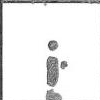

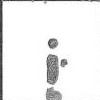

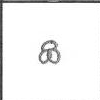

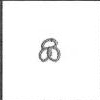

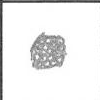

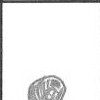

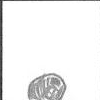

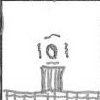

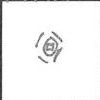

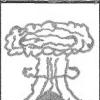

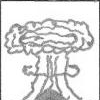

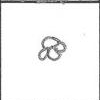

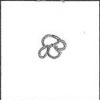

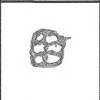

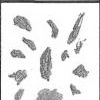

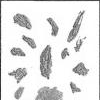

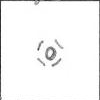

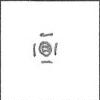

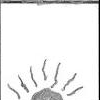

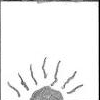

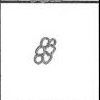

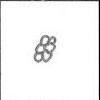

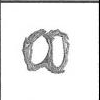

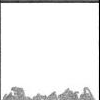

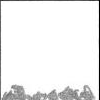

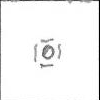

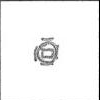

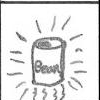

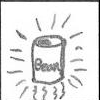

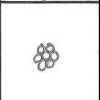

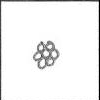

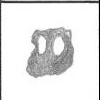

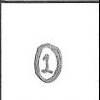

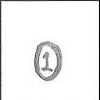

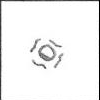

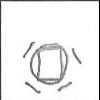

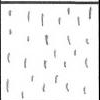

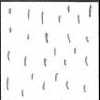

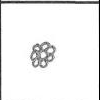

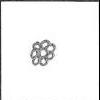

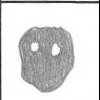

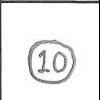

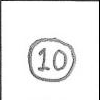

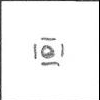

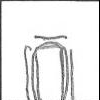

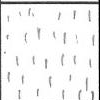

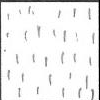

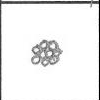

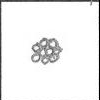

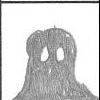

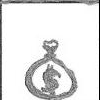

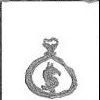

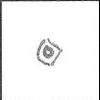

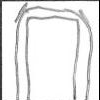

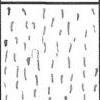

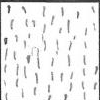

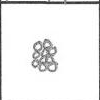

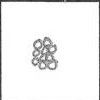

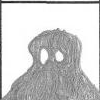

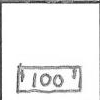

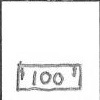

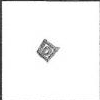

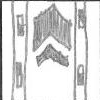

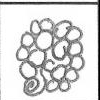

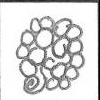

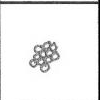

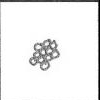

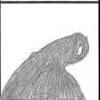

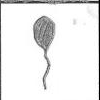

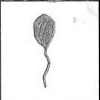

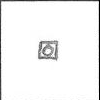

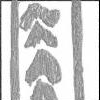

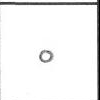

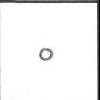

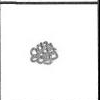

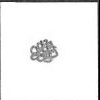

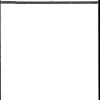

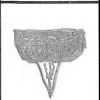

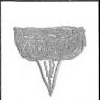

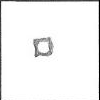

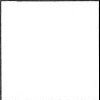

In [353]:
x_avg = 6
img_num=0
for item in cutr.x_slices:
    print(item)
    x_pos = int(item.image.width/2)
    for y in range(0,item.image.height,2):        
        
        cs = []
        for cx in range(x_pos-x_avg,x_pos+x_avg):
            if cx<0 or cx>item.image.width:
                break
            c = tiles.getpixel((cx, y))
            cs.append(c)
        #print(cs,sum(cs)/len(cs))
        if (sum(cs)/len(cs))<125:
            img = item.image.crop((0,y,100,y+100))
            img.save(f'new_split/{img_num}.png')
            img_num+=1
            display(img)
            

In [ ]:
box_size = 95
border_x = 5
border_y=7
for yi,y in enumerate(range(0,tiles.height-box_size,box_size)):
    for xi,x in enumerate(range(0,tiles.width-box_size,box_size)):
        ty=(yi*border_y)+y
        tx = (xi*border_x)+x
        im1 = tiles.crop((tx, ty, tx+box_size, ty+box_size))
        display(im1)
        im1.save(f"split/{yi}-{xi}.png")
        print(f"split/{yi}-{xi}.png")
        print()